# **ABANDONO DE EMPLEADOS**

Analizar el abandono de los empleados de la empresa para obtener insigths que puedan ayudar a disminuir el problema de retención de los mismos.

# **PASO 1: Configuración del entorno de trabajo**

###Importación de librerias

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

###Carga de datos

In [62]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

In [63]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


# **PASO 2: BUSINESS ANALYTICS**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_c

## Análisis de Calidad de Datos


#### Análisis de Nulos

In [65]:
df.isna().sum().sort_values(ascending=False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
edad                           0
nivel_acciones                 0
evaluacion                     0
satisfaccion_companeros        0
horas_quincena                 0
anos_experiencia               0
horas_extra                    0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
incremento_salario_porc        0
salario_mes                    0
mayor_edad                     0
num_empresas_anteriores        0
abandono                       0
estado_civil                   0
puesto                         0
nivel_laboral                  0
satisfaccion_entorno           0
empleados                      0
carrera                        0
distancia_casa                 0
departamento                   0
viajes                         0
anos_con_m

Conclusiones:

* anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables
* sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA


In [66]:
df.drop(columns = ['anos_en_puesto' , 'conciliacion'], inplace=True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


## Análisis Exploratorio de Variables (EDA)

### EDA Variables Categóricas

Creamos funcion para poder analizar de manera escalable las variables categoricas que contenga el dataset, mediante graficos.

In [67]:
def graficos_eda_categoricos(cat):

  #Calculamos el número de filas que necesitamos
  from math import ceil
  filas = ceil(cat.shape[1] / 2)

  #Definimos el gráfico
  f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

  #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
  ax = ax.flat

  #Creamos el bucle que va añadiendo gráficos
  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.barh(ax = ax[cada])
    ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
    ax[cada].tick_params(labelsize = 12)

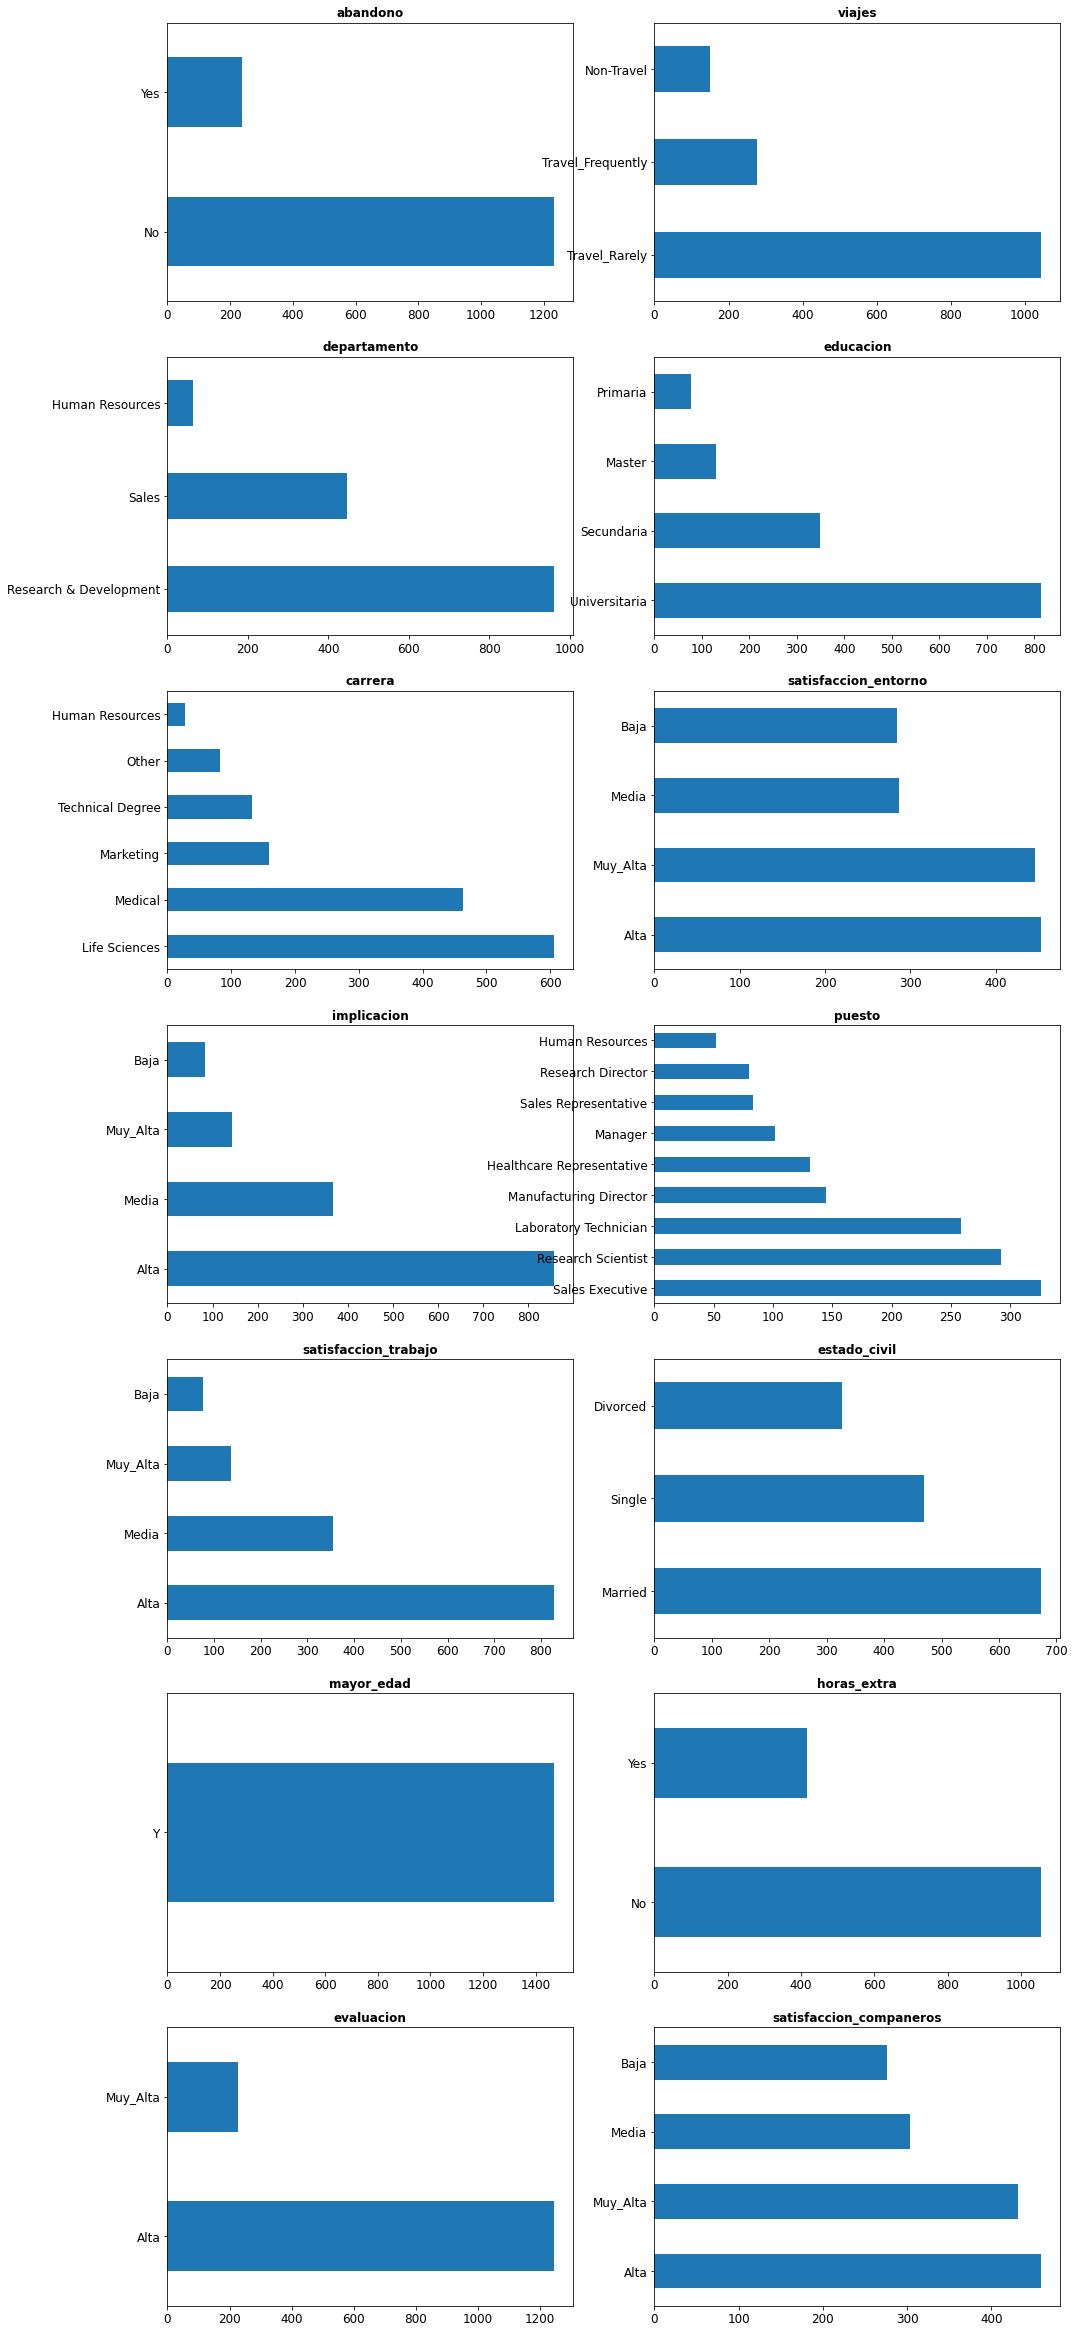

In [68]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:

* mayor_edad solo tiene un valor --> eliminarla
* Sobre las imputaciones pendientes de variables categóricas:
  * educacion: imputar por 'Universitaria'
  * satisfaccion_trabajo: imputar por 'Alta'
  * implicacion: imputar por 'Alta'

In [69]:
#Eliminamos columna mayor_edad ya que es una constante y no aporta valor
df.drop(columns = 'mayor_edad', inplace = True)

#Imputamos en las columnas educacion, satisfaccion_trabajo e implicacion según el valor máximo para cada caso analizado en los gráficos
df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

#Chequeamos nulos nuevamente
df.isna().sum().sort_values(ascending=False)

sexo                        199
edad                          0
salario_mes                   0
anos_desde_ult_promocion      0
anos_compania                 0
num_formaciones_ult_ano       0
anos_experiencia              0
nivel_acciones                0
horas_quincena                0
satisfaccion_companeros       0
evaluacion                    0
incremento_salario_porc       0
horas_extra                   0
num_empresas_anteriores       0
estado_civil                  0
abandono                      0
satisfaccion_trabajo          0
puesto                        0
nivel_laboral                 0
implicacion                   0
satisfaccion_entorno          0
empleados                     0
carrera                       0
educacion                     0
distancia_casa                0
departamento                  0
viajes                        0
anos_con_manager_actual       0
dtype: int64

### EDA Variables Numéricas

Creamos funcion para poder analizar de manera escalable las variables numericas que contenga el dataset, con datos estadisticos.

In [70]:
def estadisticos_cont(num):
  #Calculamos describe
  estadisticos = num.describe().T
  #Añadimos la mediana
  estadisticos['median'] = num.median()
  #Reordenamos para que la mediana esté al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #Lo devolvemos
  return(estadisticos)

In [71]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada


In [72]:
#Eliminación de columnas
df.drop(columns=['empleados','sexo','horas_quincena'], inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   object
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores 

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


## Aálisis y Generación de Insights

### **¿Cuál es la tasa de abondono?**

In [73]:
# De nuestra variable abandono, contamos las cantidades pero devolviendonos el valor en formato porcentaje
df.abandono.value_counts(normalize = True) * 100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

La tasa de abandono es del 16.1%

### **¿Hay un perfil tipo de empleado que deja la empresa?**

Analisis de perfil. Identificando el perfil tipo de fuga. Analisis de penetración. Tenemos una variable que queremos estudiar, nuestra variable target: fuga de empleados (abandono) y la cruzamos con cada una de las otras variables que claramente pensemos que puedan aportarnos y ayudarnos a definir un perfil. Por lo tanto, en cada uno de las otras variables observamos la penetracion de la variable target (abandono) en cada uno de los valores de esa otra variable.

In [74]:
# Transformamos la variable target abandono en numérica para que sea mas facil su tratamiento con respecto a las otras variables
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

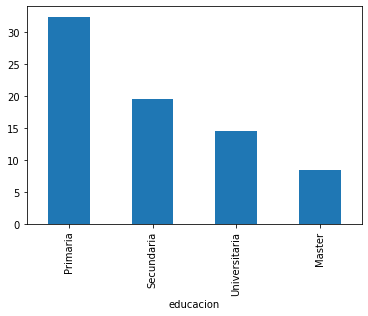

In [75]:
# Análisis por educación

# groupby segmenta la variable educación según sus posibles valores
# Para cada uno de los valores hacemos la media del abandono, de esta manera obtenemos el porcentaje más rápido ya que 
# la media de una variable 0, 1, es equivalente a su porcentaje.
# Lo que hacemos en el analisis de penetración es segmentar por cada uno de los valores de la variable que estamos analizando,
# en este caso es la variable educación y en cada uno de esos valores calculamos el porcentaje de "si"
# es decir, de empleados que se han ido de la empresa dentro de ese valor de la variable.
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

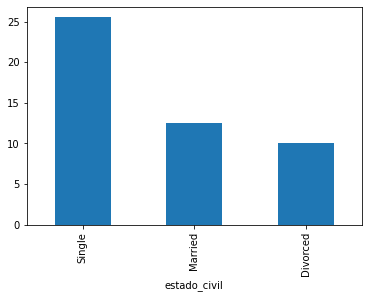

In [76]:
# Análisis por estado civil

temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

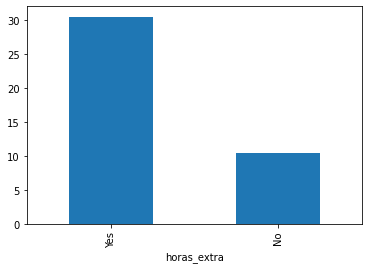

In [77]:
# Análisis por horas extras

temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

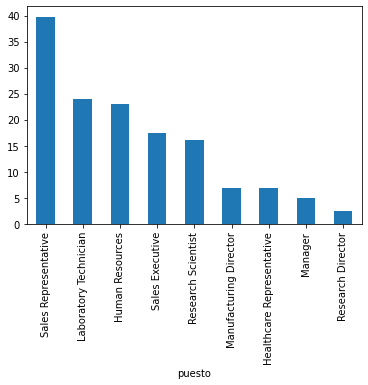

In [78]:
# Análisis por puesto

temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

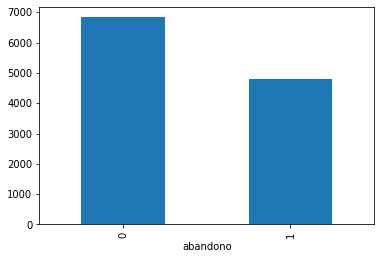

In [79]:
# Analásis por salario (variable numérica)

temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

Conclusiones:

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Alta carga de horas extras
* Trabaja en ventas
* Bajo salario


### **¿Cuál es el impacto economico de este problema? Estimación del impacto económico**

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [80]:
# Creamos una nueva variable salario_ano del empleado

df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [81]:
# Calculamos el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
                
#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


### **¿Cuánto nos ha costado este problema en el último año?**

In [82]:
# La variable loc lo que nos permite es filtrar auqellos resultados de la variable abandono == 1
# y luego sumamos la variable impacto_abandono de cada registro para obtener su total

coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

2719005.912

### **¿Cuánto nos cuesta que los empleados no esten motivados? (perdidas en implicación == Baja)**

In [83]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

368672.688

### **¿Cuánto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?**

In [84]:
# Planteo de 3 escenarios:

# Planteo pesimista:
print(f"Reducir un 10% la fuga de los empleados nos ahorrariía {int(coste_total * 0.1)}$ cada año.")

# Planteo normal, post acciones de fidelización:
print(f"Reducir un 10% la fuga de los empleados nos ahorrariía {int(coste_total * 0.2)}$ cada año.")

# Planteo optimista:
print(f"Reducir un 10% la fuga de los empleados nos ahorrariía {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de los empleados nos ahorrariía 271900$ cada año.
Reducir un 10% la fuga de los empleados nos ahorrariía 543801$ cada año.
Reducir un 10% la fuga de los empleados nos ahorrariía 815701$ cada año.


### **Estrategias asociadas a los insights de abandono:**

Pudimos observar que los representantes de ventas son los que más sevan. ¿Tendría sentido hacer un plan específico para ellos? ¿Cúal sería el coste ahorrado si disminuímos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado



In [85]:
# Hacer un conteo con len filtrando con loc por puesto.
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado
porc_pasado 

0.39759036144578314

Estimación de cuantos empleados se irían este año

In [86]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)
se_iran

19

Sobre los que se irán, cuantos podremos retener (hipótesis 30%) y cuanto dinero supondría:

In [87]:
retenemos = int(se_iran * 0.3)
ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0), 'impacto_abandono'].sum() * porc_pasado * 0.3
print(f'Podemos retener {retenemos} representantes de ventas y ello supondría un ahorro de {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría un ahorro de 37447.22424578312$.


Este dato es muy importante porque nos permite determinar el presupuesto para acciones de retención por departamento o perfil, ya que sabemos que podemos gastar hasta 37.000$ sólo en acciones específicas para retener a representates de ventas y se estarían pangando sólas con la pérdida evitada.

# **PASO 3: MACHINE LEARNING**

In [88]:
df_ml = df.copy()

In [89]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empr

### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

#### Transformar todas las variables categóricas a númericas

In [90]:
from sklearn.preprocessing import OneHotEncoder

# Esta libreria nos permite separar de una variable, todos sus posibles valores como variables.
# Ejemplo: Variable (columna) colores: Rojo, Amarillo, Verde.
# Nuevas variables (columnas): colores_Rojo, colores_Amarillo, colores_Verde.
# Además transformamos a numericas todas las variables, siendo 1 si corresponde a esa variable o 0 si no corresponde.

# Variables categóricas
cat = df_ml.select_dtypes('O')

# Instanciamos
ohe = OneHotEncoder(sparse = False)

# Entrenamos
ohe.fit(cat)

# Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [91]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Dataframe final

En el data frame anterior solo tenemos la conversion de las variables categoricas, por lo que ahora necesitamos anexar las variables numericas para obtener el data frame final. Seleccionamos las variables numércias para poder juntarlas con el data frame de las variables categoricas cat_ohe:

In [92]:
num = df.select_dtypes('number').reset_index(drop = True)

In [93]:
num

,edad,abandono,distancia_casa,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,41,1,1,2,5993,8,11,0,8,0,6,0,5,71916,14670.864
1,49,0,8,2,5130,1,23,1,10,3,10,1,7,61560,12558.240
2,37,1,2,1,2090,6,15,0,7,3,0,0,0,25080,4037.880
3,33,0,3,1,2909,1,11,0,8,3,8,3,0,34908,6876.876
4,27,0,2,1,3468,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,23,2,2571,4,17,1,17,3,5,0,3,30852,6077.844
1466,39,0,6,3,9991,4,15,1,9,5,7,1,7,119892,25177.320
1467,27,0,4,2,6142,1,20,1,6,0,6,0,3,73704,15035.616
1468,49,0,2,2,5390,2,14,0,17,3,9,0,8,64680,13194.720


Juntamos los dos data frames en un data frame final:

In [94]:
df_ml = pd.concat([cat_ohe,num], axis = 1)

In [95]:
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


### DISEÑO DE LA MODELIZACIÓN

####Separación de las variables predictoras y taget

In [96]:
# Variables predictoras
x = df_ml.drop(columns='abandono')

In [97]:
# Variable target
y = df_ml['abandono']

####Separación train (70%) y test (30%)

In [98]:
from sklearn.model_selection import train_test_split

# Del conjunto de variables predictoras y target, separamos de forma aleatoria un 70% para entrenar y un 30% para testear.

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

### ENTRENAMIENTO DEL MODELO SOBRE TRAIN: ALGORÍTMO ÁRBOL DE DECISION

Necesitamos importar una clase de skitlearn que se llama DecisionTreeClasifier. Si quisieramos utilizar una regresión, buscariamos una clase que haga esa regresión. Toda la logica viene paquetizada en las clases.
En este caso, tenemos que definir como queremos que sea nuestro arbol de decisión, que en este caso solo definimos la profundidad máxima, es decir, el numero de niveles por debajo del nivel incial que va a tener el árbol.


In [99]:
from sklearn.tree import DecisionTreeClassifier

# Esta libreria importa el arbol de decisiones

# Instanciar
ac = DecisionTreeClassifier(max_depth = 4) #Definicion del arbol

# Entrenar
ac.fit(train_x,train_y) #Metodo fit, que es para entrenar. Pasamos variables predictoras y variable target

# Devuelve nuestro árbol de decision ya entrenado. En este momento ya tenemos un modelo entrenado.

DecisionTreeClassifier(max_depth=4)

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

Predcciones: Con el objeto ac (modelo ya entrenado) y con el metodo predict_proba lo que estamos haciendo es coger un conjunto de datos que le pasemos (test_X) que en nuestro caso es un conjunto de datos reservados que el modelo nunca a tratado y aplicarle ese modelo entrenado para generar unas predicciones de probabilidad. Esto nos devolvera las probabilidades de que cada registro sea un 0 o un 1, por lo que con [:,1] solo nos interesan los 1 (que cada empleado deje la empresa). Esto nos devuelve las predicciones. Luego, del objeto de predicciones, le pedimos que nos muestre los 20 primeros valores. 

Resumiendo: Con el método fit, entrenamos nuestro modelo. Con el método predict_proba, obtenemos la probabilidad de que cada empleado se va ir de la empresa.

In [100]:
# Predicción
pred = ac.predict_proba(test_x)[:,1] #Predict proba, coge un conjunto de datos (test) y aplicamos el modelo entrenado. Devolver valores 1
pred[:20] #Mostrarnos los 20 primeros valores

array([0.0745614 , 0.0745614 , 0.0990991 , 0.08450704, 0.81818182,
       0.0990991 , 0.0745614 , 0.0990991 , 0.0990991 , 0.0745614 ,
       0.26315789, 0.0745614 , 0.0990991 , 0.08450704, 0.08450704,
       0.08450704, 0.41176471, 0.        , 0.41176471, 0.0745614 ])

Evaluación: Estas probabilidades son probabilidades individuales para cada registro, por lo que necesitamos de alguna manera contrastarlo con valores de la realidad histórica, para poder ver si el modelo esta fallando o acertando. Es decir, deberiamos contrastar que para el scoring de un empleado en el cual nos entrega una probabilidad alta de abandono, ese empleado haya dejado la empresa. Para poder realizar esa comprobación de una manera mas rápida, masiva o global, obteniendo una única metrica que podamos evaluar, podemos utilizar la metrica roc_auc_score, una de las métricas más utilizada (dentro de las curvas roc, usamos la metrica auc). Nos devolvera un numero que si esta por debajo de 0,7 (no es muy bueno). Si esta entre 0,7 y 0,8 es bueno y practico y si esta entre 0,8 y 1 el modelo es muy bueno. 
Importamos la clase que nos permite utilizar esta metrica y le pasamos el valor que ha sido la realidad (target) (test_y) los que se han ido y los que no del conjunto de test (que el modelo nunca ha visto) y la prediccion (pred) de nuestro modelo.
Por lo tanto esta metrica compara la prediccion del modelo con lo que ha sido la realidad, datos que el modelo nunca ha visto, en una sola metrica.
Si el modelo no es bueno (por debajo de 0,7) para corregirlo podemos, entre otras cosas, meterle mas datos, nuevos datos, intentar trabajar sobre el propio modelo. Probar con nuevos algoritmos, probar la hiperparametrización de los parametros, etc.

In [101]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.6969585389203918

**Resumiendo, para crear un modelo de ML:**

1. Importo la clase del modelo o algoritmo que quiero utilizar `(DecisionTreeClassifier) `
2. Lo defino con los parametros que quiero utilizar `(ac = DecisionTreeClassifier(max_depth=4)`
3. Lo entreno con el método **fit**` (ac.fit(train_x,train_y)`
4. Hago predicciones con el método **predict_proba** `( pred = ac.predict_proba(test_x)[:,1]`
5. Lo evalulo con la clase **roc_auc_score** `(roc_auc_score(test_y,pred)`
6. Evaluo resultados:\
    **return < 0.7 -> Mejorar modelo \
    0.7 < return <= 0.8 -> Bueno \
    0.8 <=  return <= 1.0 -> Muy bueno**

### INTERPRETACIÓN

#### Diagrama del árbol

El algoritmo con mayor capacidad de explicabilidad (sin tener que hacer nada adicional) es el árbol de decisión. Los diagramas de árboles pueden ser leidos como reglas de negocio "Si... Entonces" lo cual es muy útil y fácil de aplicar en contextos de negocio.
Utilizamos la clase de scikit-learn (sklearn) plot_tree.

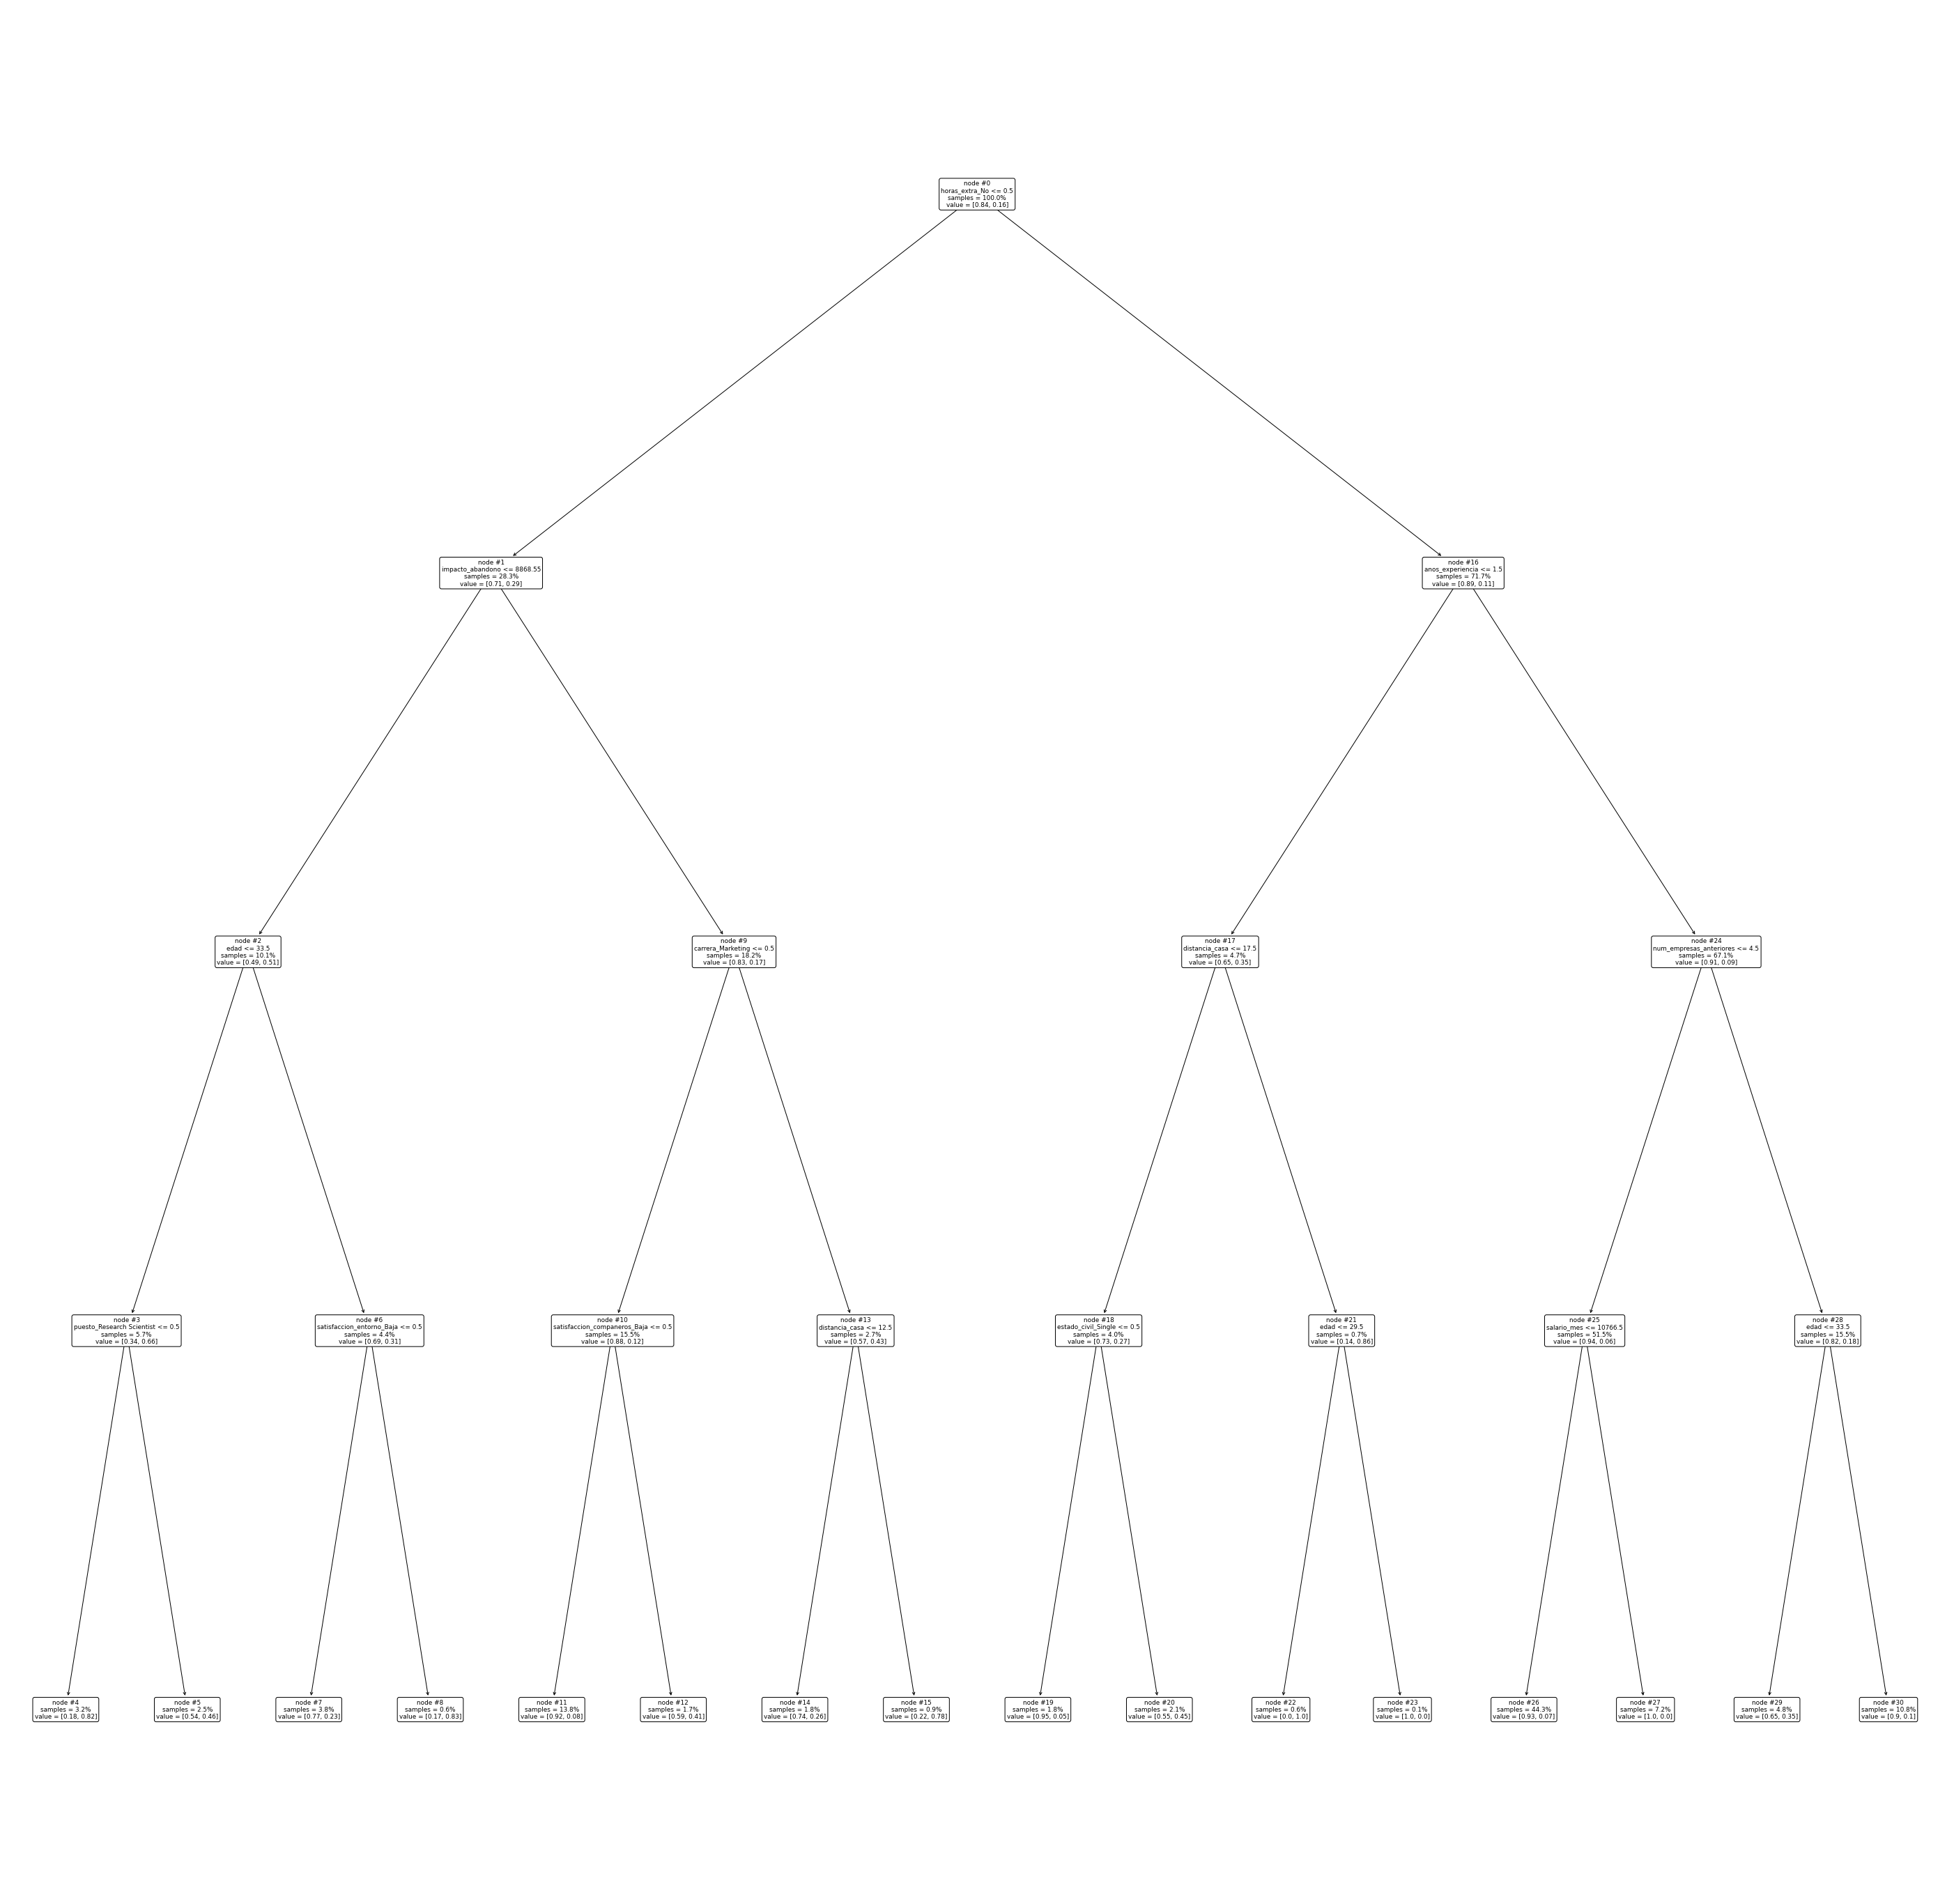

In [102]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50)) #Definimos el tamaño de la imagen

# Opciones con las que queremos que se genere el gráfico (mas usuales)
plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

#### Importancia de las variables

A nivel macro, en lo que es el total del modelo que hemos construido, cuales son las variables que son mas relevantes. 
Muchas de ellas tienen importancia 0, es decir, no son importantes para que el empleado se vaya.
A partir del grafico, podriamos subdividir en grupo de variables por importancia.

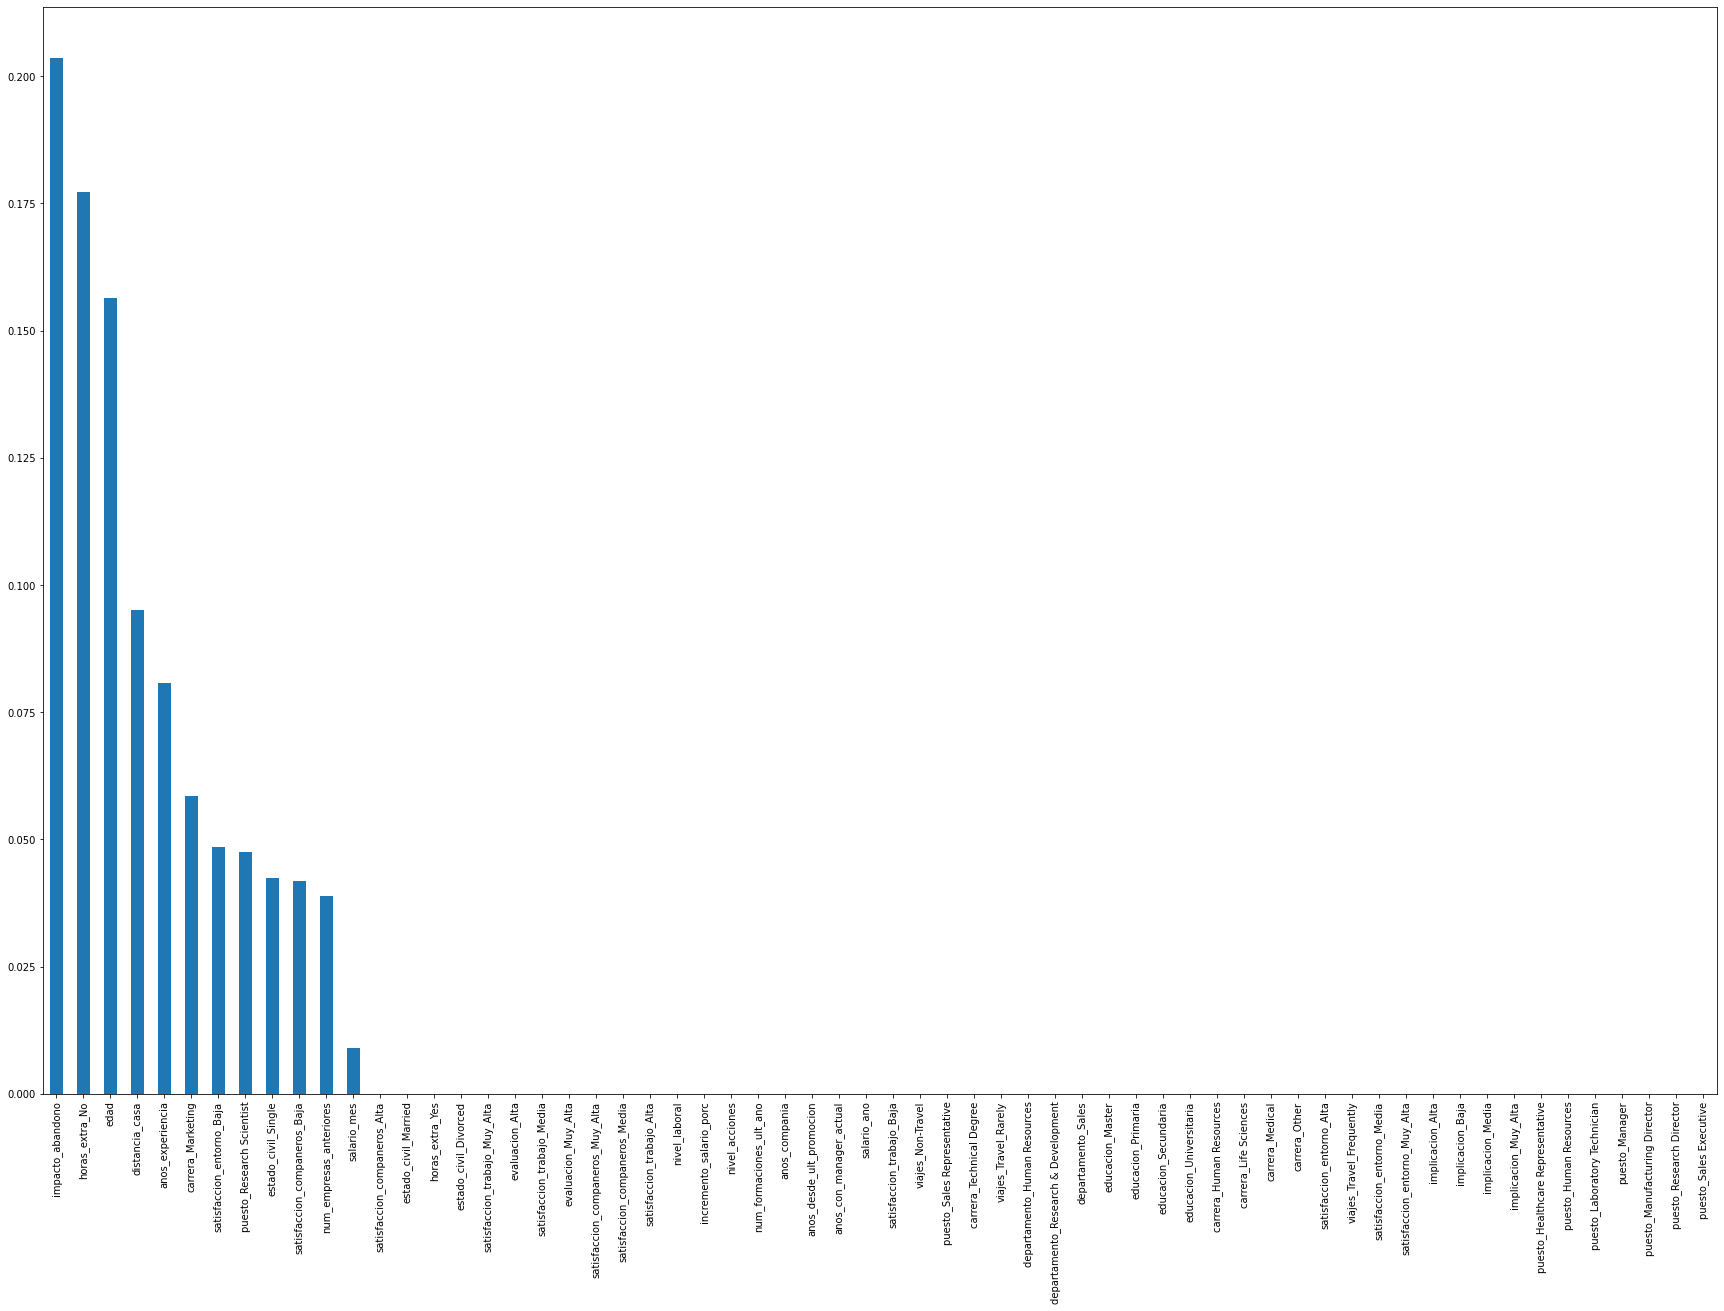

In [103]:
pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

### EXPLOTACIÓN

Incoporación del scoring al dataframe principal

Incorporamos esta información dentro del data set total `df`.
Para ello contruimos una nueva variable (columna) `df['scoring_abandono']`



In [104]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:,1]

Donde:

1.   `ac.predict_proba` = probabilidad de la predicción de nuestro modelo.  
2.   `df_ml.drop(columns = 'abandono')` = eliminación de la columna 'abandono' de nuestro data frame de machine learning.
3.    `[:,1]` = resultado de la predicción, pero solo los 1, es decir, la probabilidad de que el empleado se vaya.



In [105]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.411765
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.074561
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.230769
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.461538
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.346939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.074561
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.074561
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.084507


Ejemplo de los 10 empleados con mayor probabilidad de dejar la empresa

In [106]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1107,26,1,Travel_Rarely,Research & Development,21,Universitaria,Medical,Baja,Alta,1,...,Alta,1,1,0,1,0,0,28524,4592.364,1.000000
1928,29,1,Travel_Frequently,Sales,24,Universitaria,Technical Degree,Alta,Muy_Alta,1,...,Muy_Alta,0,1,3,1,0,0,13092,2107.812,1.000000
1714,24,1,Travel_Rarely,Human Resources,22,Primaria,Human Resources,Muy_Alta,Baja,1,...,Alta,1,1,2,1,0,0,18660,3004.260,1.000000
1944,27,1,Travel_Frequently,Human Resources,22,Secundaria,Human Resources,Baja,Media,1,...,Baja,0,1,2,1,0,0,34356,6768.132,1.000000
55,26,1,Travel_Rarely,Research & Development,25,Universitaria,Life Sciences,Baja,Baja,1,...,Alta,0,1,2,1,0,1,27516,4430.076,1.000000
923,21,1,Travel_Rarely,Research & Development,18,Universitaria,Other,Muy_Alta,Alta,1,...,Baja,0,1,3,1,0,0,32316,6366.252,1.000000
1081,51,1,Travel_Rarely,Research & Development,4,Universitaria,Life Sciences,Baja,Alta,1,...,Alta,3,18,2,10,2,7,29532,4754.652,0.833333
1569,35,1,Travel_Rarely,Research & Development,2,Universitaria,Life Sciences,Baja,Alta,1,...,Muy_Alta,1,1,2,1,0,0,24888,4006.968,0.833333
874,44,0,Travel_Rarely,Research & Development,8,Master,Life Sciences,Baja,Muy_Alta,1,...,Alta,1,10,2,3,0,2,33816,6661.752,0.833333


Donde:


1.   `df.sort_values(by ='scoring_abandono , ascendig = False)` = Ordenar valores del data frame por la columna 'scoring_abandono' de forma descendente.
2.   `[0:10]` = Mostrar los 10 primeros valores



Ejemplo: riesgo de dejar la empresa por puesto de trabajo

A modo de realizar analisis un poco mas estrategicos, mostramos la predicción por puesto de trabajo. Podria ser por manager, oficina, etc.
Mostramos en un grafico de "caja y bigotes" 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


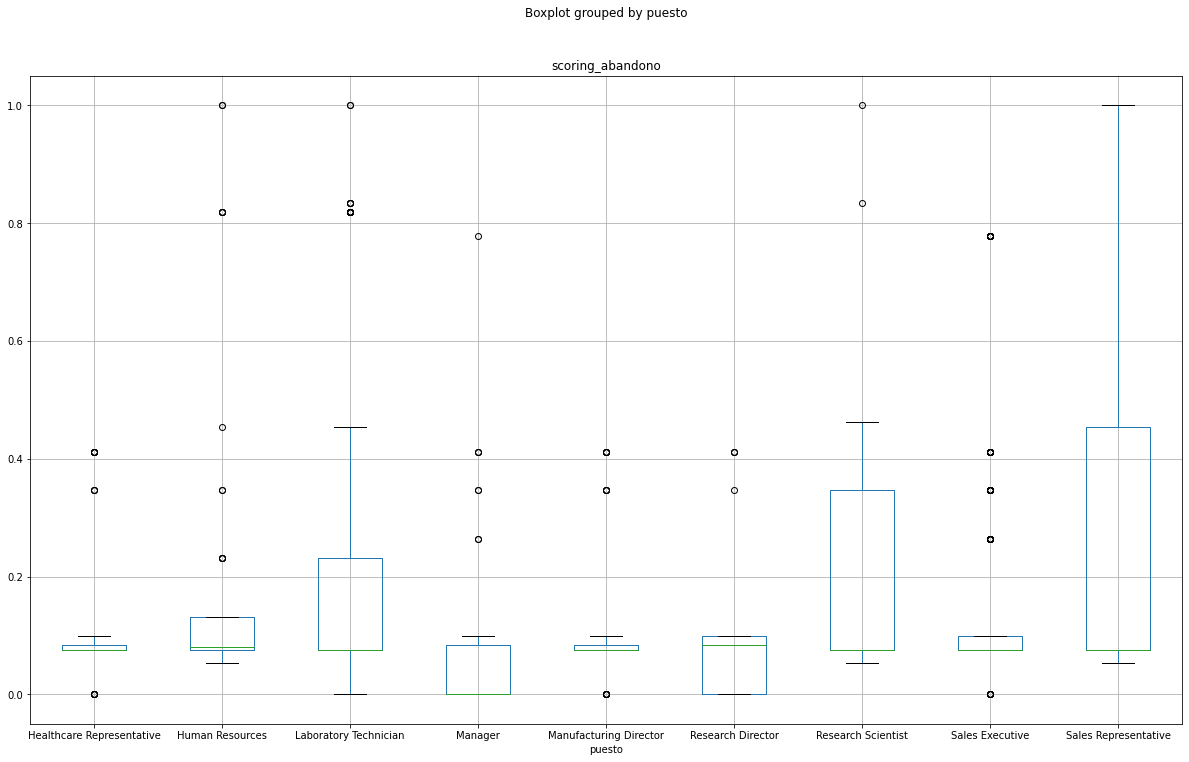

In [107]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

Donde:


1.   `df` = Dataframe
2.  ` boxplot` = Grafico de cajas
3.  ` column='scoring_abandono'` = Eje y
4.  ` by='puesto'` = Eje x
5.   `figsize = (20,12)` = Tamaño de la figura (ancho, alto)



### GUARDAR EL RESULTADO

Por último, guardamos el resultado (dataframe).
Lo transformamos en formato Excel.
Lo descargamos en nuestro ordenador.
Con este resultado es con lo que trabajaremos como data set para COMUNICACION y VISUALIZACION.

In [108]:
from google.colab import files
df.to_excel('abandono_con_scoring.xlsx')
files.download('abandono_con_scoring.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Donde:

1.   `df.to_excel('abandono_con_scoring.xlsx')` = Transformacion del dataframe a excel con el nombre y extención entre parentesis.
2.   `files.download('abandono_con_scoring.xlsx')` = Descargar el archivo resultante con nombre y extension entre parentesis.

